## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49ms	remaining: 49s
1:	learn: 0.9301086	total: 51ms	remaining: 25.4s
2:	learn: 0.9005637	total: 52.9ms	remaining: 17.6s
3:	learn: 0.8720983	total: 54.9ms	remaining: 13.7s
4:	learn: 0.8467410	total: 56.7ms	remaining: 11.3s
5:	learn: 0.8226672	total: 58.5ms	remaining: 9.7s
6:	learn: 0.7994702	total: 60.4ms	remaining: 8.57s
7:	learn: 0.7784272	total: 62.2ms	remaining: 7.71s
8:	learn: 0.7602192	total: 64.1ms	remaining: 7.06s
9:	learn: 0.7412421	total: 66.1ms	remaining: 6.54s
10:	learn: 0.7247930	total: 68ms	remaining: 6.11s
11:	learn: 0.7089951	total: 69.9ms	remaining: 5.75s
12:	learn: 0.6951345	total: 71.7ms	remaining: 5.45s
13:	learn: 0.6809276	total: 73.7ms	remaining: 5.19s
14:	learn: 0.6692630	total: 75.5ms	remaining: 4.96s
15:	learn: 0.6588323	total: 77.4ms	remaining: 4.76s
16:	learn: 0.6472700	total: 79.2ms	remaining: 4.58s
17:	learn: 0.6379982	total: 80.9ms	remaining: 4.42s
18:	learn: 0.6294674	total: 82.8ms	remaining: 4.27s
19:	learn: 0.6193295	total: 84.

60:	learn: 0.4809744	total: 164ms	remaining: 2.52s
61:	learn: 0.4801376	total: 166ms	remaining: 2.51s
62:	learn: 0.4792422	total: 168ms	remaining: 2.5s
63:	learn: 0.4780719	total: 170ms	remaining: 2.48s
64:	learn: 0.4771984	total: 172ms	remaining: 2.47s
65:	learn: 0.4759610	total: 174ms	remaining: 2.46s
66:	learn: 0.4750287	total: 175ms	remaining: 2.44s
67:	learn: 0.4740093	total: 177ms	remaining: 2.43s
68:	learn: 0.4732612	total: 179ms	remaining: 2.42s
69:	learn: 0.4727266	total: 181ms	remaining: 2.4s
70:	learn: 0.4716549	total: 183ms	remaining: 2.39s
71:	learn: 0.4709088	total: 185ms	remaining: 2.38s
72:	learn: 0.4697594	total: 187ms	remaining: 2.37s
73:	learn: 0.4690934	total: 189ms	remaining: 2.36s
74:	learn: 0.4680942	total: 191ms	remaining: 2.35s
75:	learn: 0.4672726	total: 192ms	remaining: 2.34s
76:	learn: 0.4664479	total: 194ms	remaining: 2.33s
77:	learn: 0.4656044	total: 196ms	remaining: 2.32s
78:	learn: 0.4645375	total: 198ms	remaining: 2.31s
79:	learn: 0.4639654	total: 200ms

86:	learn: 0.4583577	total: 214ms	remaining: 2.25s
87:	learn: 0.4577999	total: 216ms	remaining: 2.24s
88:	learn: 0.4572657	total: 218ms	remaining: 2.23s
89:	learn: 0.4569360	total: 220ms	remaining: 2.22s
90:	learn: 0.4559969	total: 222ms	remaining: 2.21s
91:	learn: 0.4549716	total: 224ms	remaining: 2.21s
92:	learn: 0.4544919	total: 226ms	remaining: 2.2s
93:	learn: 0.4537693	total: 228ms	remaining: 2.19s
94:	learn: 0.4532673	total: 229ms	remaining: 2.19s
95:	learn: 0.4526987	total: 231ms	remaining: 2.18s
96:	learn: 0.4520952	total: 233ms	remaining: 2.17s
97:	learn: 0.4513919	total: 235ms	remaining: 2.16s
98:	learn: 0.4503747	total: 237ms	remaining: 2.15s
99:	learn: 0.4494783	total: 238ms	remaining: 2.15s
100:	learn: 0.4487329	total: 240ms	remaining: 2.14s
101:	learn: 0.4481325	total: 242ms	remaining: 2.13s
102:	learn: 0.4475445	total: 244ms	remaining: 2.13s
103:	learn: 0.4466014	total: 246ms	remaining: 2.12s
104:	learn: 0.4461730	total: 248ms	remaining: 2.11s
105:	learn: 0.4457259	total

147:	learn: 0.4264987	total: 327ms	remaining: 1.88s
148:	learn: 0.4262192	total: 329ms	remaining: 1.88s
149:	learn: 0.4257966	total: 331ms	remaining: 1.88s
150:	learn: 0.4253062	total: 333ms	remaining: 1.87s
151:	learn: 0.4247446	total: 335ms	remaining: 1.87s
152:	learn: 0.4237365	total: 337ms	remaining: 1.86s
153:	learn: 0.4233079	total: 339ms	remaining: 1.86s
154:	learn: 0.4228876	total: 340ms	remaining: 1.86s
155:	learn: 0.4225404	total: 342ms	remaining: 1.85s
156:	learn: 0.4222831	total: 344ms	remaining: 1.85s
157:	learn: 0.4218088	total: 346ms	remaining: 1.84s
158:	learn: 0.4213239	total: 348ms	remaining: 1.84s
159:	learn: 0.4210022	total: 350ms	remaining: 1.84s
160:	learn: 0.4201256	total: 352ms	remaining: 1.83s
161:	learn: 0.4197073	total: 354ms	remaining: 1.83s
162:	learn: 0.4192052	total: 356ms	remaining: 1.82s
163:	learn: 0.4187949	total: 357ms	remaining: 1.82s
164:	learn: 0.4184572	total: 359ms	remaining: 1.82s
165:	learn: 0.4180680	total: 361ms	remaining: 1.81s
166:	learn: 

174:	learn: 0.4144190	total: 379ms	remaining: 1.78s
175:	learn: 0.4140875	total: 381ms	remaining: 1.78s
176:	learn: 0.4136755	total: 382ms	remaining: 1.78s
177:	learn: 0.4133860	total: 384ms	remaining: 1.77s
178:	learn: 0.4129780	total: 386ms	remaining: 1.77s
179:	learn: 0.4122907	total: 388ms	remaining: 1.77s
180:	learn: 0.4119188	total: 390ms	remaining: 1.76s
181:	learn: 0.4115412	total: 392ms	remaining: 1.76s
182:	learn: 0.4112620	total: 393ms	remaining: 1.76s
183:	learn: 0.4107734	total: 395ms	remaining: 1.75s
184:	learn: 0.4104881	total: 397ms	remaining: 1.75s
185:	learn: 0.4100009	total: 399ms	remaining: 1.75s
186:	learn: 0.4096453	total: 401ms	remaining: 1.74s
187:	learn: 0.4093395	total: 403ms	remaining: 1.74s
188:	learn: 0.4090020	total: 405ms	remaining: 1.74s
189:	learn: 0.4085981	total: 406ms	remaining: 1.73s
190:	learn: 0.4082397	total: 408ms	remaining: 1.73s
191:	learn: 0.4079846	total: 410ms	remaining: 1.73s
192:	learn: 0.4076364	total: 412ms	remaining: 1.72s
193:	learn: 

233:	learn: 0.3949269	total: 490ms	remaining: 1.6s
234:	learn: 0.3945894	total: 493ms	remaining: 1.6s
235:	learn: 0.3944181	total: 494ms	remaining: 1.6s
236:	learn: 0.3941497	total: 496ms	remaining: 1.6s
237:	learn: 0.3939819	total: 498ms	remaining: 1.59s
238:	learn: 0.3938322	total: 500ms	remaining: 1.59s
239:	learn: 0.3935463	total: 502ms	remaining: 1.59s
240:	learn: 0.3933166	total: 504ms	remaining: 1.59s
241:	learn: 0.3930992	total: 506ms	remaining: 1.58s
242:	learn: 0.3928898	total: 507ms	remaining: 1.58s
243:	learn: 0.3926199	total: 509ms	remaining: 1.58s
244:	learn: 0.3923955	total: 511ms	remaining: 1.57s
245:	learn: 0.3922312	total: 513ms	remaining: 1.57s
246:	learn: 0.3919499	total: 515ms	remaining: 1.57s
247:	learn: 0.3917420	total: 517ms	remaining: 1.57s
248:	learn: 0.3915186	total: 518ms	remaining: 1.56s
249:	learn: 0.3912759	total: 520ms	remaining: 1.56s
250:	learn: 0.3908375	total: 522ms	remaining: 1.56s
251:	learn: 0.3904815	total: 524ms	remaining: 1.55s
252:	learn: 0.39

260:	learn: 0.3884539	total: 541ms	remaining: 1.53s
261:	learn: 0.3882459	total: 543ms	remaining: 1.53s
262:	learn: 0.3881101	total: 545ms	remaining: 1.53s
263:	learn: 0.3879324	total: 546ms	remaining: 1.52s
264:	learn: 0.3876861	total: 549ms	remaining: 1.52s
265:	learn: 0.3874255	total: 550ms	remaining: 1.52s
266:	learn: 0.3868515	total: 552ms	remaining: 1.52s
267:	learn: 0.3866114	total: 554ms	remaining: 1.51s
268:	learn: 0.3863119	total: 556ms	remaining: 1.51s
269:	learn: 0.3860579	total: 558ms	remaining: 1.51s
270:	learn: 0.3858830	total: 560ms	remaining: 1.51s
271:	learn: 0.3857050	total: 562ms	remaining: 1.5s
272:	learn: 0.3855021	total: 564ms	remaining: 1.5s
273:	learn: 0.3852614	total: 565ms	remaining: 1.5s
274:	learn: 0.3851459	total: 567ms	remaining: 1.5s
275:	learn: 0.3849180	total: 569ms	remaining: 1.49s
276:	learn: 0.3846590	total: 571ms	remaining: 1.49s
277:	learn: 0.3844409	total: 573ms	remaining: 1.49s
278:	learn: 0.3842433	total: 575ms	remaining: 1.49s
279:	learn: 0.38

320:	learn: 0.3757763	total: 653ms	remaining: 1.38s
321:	learn: 0.3756076	total: 655ms	remaining: 1.38s
322:	learn: 0.3754123	total: 657ms	remaining: 1.38s
323:	learn: 0.3751852	total: 659ms	remaining: 1.37s
324:	learn: 0.3750004	total: 661ms	remaining: 1.37s
325:	learn: 0.3749086	total: 663ms	remaining: 1.37s
326:	learn: 0.3746654	total: 664ms	remaining: 1.37s
327:	learn: 0.3745405	total: 666ms	remaining: 1.36s
328:	learn: 0.3743710	total: 668ms	remaining: 1.36s
329:	learn: 0.3741679	total: 670ms	remaining: 1.36s
330:	learn: 0.3738646	total: 672ms	remaining: 1.36s
331:	learn: 0.3736647	total: 674ms	remaining: 1.35s
332:	learn: 0.3733429	total: 676ms	remaining: 1.35s
333:	learn: 0.3732059	total: 677ms	remaining: 1.35s
334:	learn: 0.3730574	total: 679ms	remaining: 1.35s
335:	learn: 0.3728663	total: 681ms	remaining: 1.35s
336:	learn: 0.3727111	total: 683ms	remaining: 1.34s
337:	learn: 0.3724765	total: 685ms	remaining: 1.34s
338:	learn: 0.3722959	total: 687ms	remaining: 1.34s
339:	learn: 

347:	learn: 0.3705958	total: 705ms	remaining: 1.32s
348:	learn: 0.3703798	total: 707ms	remaining: 1.32s
349:	learn: 0.3701923	total: 709ms	remaining: 1.32s
350:	learn: 0.3700067	total: 711ms	remaining: 1.31s
351:	learn: 0.3698930	total: 713ms	remaining: 1.31s
352:	learn: 0.3697314	total: 715ms	remaining: 1.31s
353:	learn: 0.3695617	total: 717ms	remaining: 1.31s
354:	learn: 0.3694397	total: 718ms	remaining: 1.3s
355:	learn: 0.3692589	total: 720ms	remaining: 1.3s
356:	learn: 0.3691107	total: 722ms	remaining: 1.3s
357:	learn: 0.3689645	total: 724ms	remaining: 1.3s
358:	learn: 0.3687886	total: 726ms	remaining: 1.29s
359:	learn: 0.3686485	total: 728ms	remaining: 1.29s
360:	learn: 0.3685749	total: 730ms	remaining: 1.29s
361:	learn: 0.3683909	total: 731ms	remaining: 1.29s
362:	learn: 0.3682710	total: 733ms	remaining: 1.29s
363:	learn: 0.3681254	total: 735ms	remaining: 1.28s
364:	learn: 0.3679761	total: 737ms	remaining: 1.28s
365:	learn: 0.3677932	total: 739ms	remaining: 1.28s
366:	learn: 0.36

407:	learn: 0.3611516	total: 817ms	remaining: 1.19s
408:	learn: 0.3609621	total: 819ms	remaining: 1.18s
409:	learn: 0.3608193	total: 821ms	remaining: 1.18s
410:	learn: 0.3604920	total: 823ms	remaining: 1.18s
411:	learn: 0.3603038	total: 825ms	remaining: 1.18s
412:	learn: 0.3602055	total: 826ms	remaining: 1.17s
413:	learn: 0.3599094	total: 828ms	remaining: 1.17s
414:	learn: 0.3597887	total: 830ms	remaining: 1.17s
415:	learn: 0.3595791	total: 832ms	remaining: 1.17s
416:	learn: 0.3594487	total: 834ms	remaining: 1.17s
417:	learn: 0.3592759	total: 836ms	remaining: 1.16s
418:	learn: 0.3591088	total: 838ms	remaining: 1.16s
419:	learn: 0.3589470	total: 839ms	remaining: 1.16s
420:	learn: 0.3587972	total: 841ms	remaining: 1.16s
421:	learn: 0.3586831	total: 843ms	remaining: 1.16s
422:	learn: 0.3585620	total: 845ms	remaining: 1.15s
423:	learn: 0.3584427	total: 847ms	remaining: 1.15s
424:	learn: 0.3583044	total: 849ms	remaining: 1.15s
425:	learn: 0.3581698	total: 851ms	remaining: 1.15s
426:	learn: 

434:	learn: 0.3570185	total: 867ms	remaining: 1.13s
435:	learn: 0.3568416	total: 869ms	remaining: 1.12s
436:	learn: 0.3566846	total: 871ms	remaining: 1.12s
437:	learn: 0.3565875	total: 873ms	remaining: 1.12s
438:	learn: 0.3564768	total: 875ms	remaining: 1.12s
439:	learn: 0.3563559	total: 877ms	remaining: 1.11s
440:	learn: 0.3561557	total: 879ms	remaining: 1.11s
441:	learn: 0.3559793	total: 880ms	remaining: 1.11s
442:	learn: 0.3558695	total: 882ms	remaining: 1.11s
443:	learn: 0.3557039	total: 884ms	remaining: 1.11s
444:	learn: 0.3555934	total: 886ms	remaining: 1.1s
445:	learn: 0.3553700	total: 888ms	remaining: 1.1s
446:	learn: 0.3553048	total: 890ms	remaining: 1.1s
447:	learn: 0.3550824	total: 891ms	remaining: 1.1s
448:	learn: 0.3549146	total: 893ms	remaining: 1.1s
449:	learn: 0.3548607	total: 895ms	remaining: 1.09s
450:	learn: 0.3546809	total: 897ms	remaining: 1.09s
451:	learn: 0.3545787	total: 899ms	remaining: 1.09s
452:	learn: 0.3544310	total: 901ms	remaining: 1.09s
453:	learn: 0.354

492:	learn: 0.3487285	total: 980ms	remaining: 1.01s
493:	learn: 0.3486318	total: 982ms	remaining: 1s
494:	learn: 0.3485016	total: 984ms	remaining: 1s
495:	learn: 0.3484072	total: 986ms	remaining: 1s
496:	learn: 0.3482698	total: 988ms	remaining: 1000ms
497:	learn: 0.3481630	total: 990ms	remaining: 997ms
498:	learn: 0.3480855	total: 991ms	remaining: 995ms
499:	learn: 0.3478655	total: 993ms	remaining: 993ms
500:	learn: 0.3477966	total: 995ms	remaining: 991ms
501:	learn: 0.3476142	total: 997ms	remaining: 989ms
502:	learn: 0.3474667	total: 999ms	remaining: 987ms
503:	learn: 0.3473844	total: 1s	remaining: 985ms
504:	learn: 0.3471852	total: 1s	remaining: 983ms
505:	learn: 0.3471124	total: 1s	remaining: 981ms
506:	learn: 0.3469987	total: 1.01s	remaining: 978ms
507:	learn: 0.3469000	total: 1.01s	remaining: 976ms
508:	learn: 0.3467621	total: 1.01s	remaining: 974ms
509:	learn: 0.3466653	total: 1.01s	remaining: 972ms
510:	learn: 0.3465795	total: 1.01s	remaining: 970ms
511:	learn: 0.3464899	total: 

520:	learn: 0.3453067	total: 1.03s	remaining: 950ms
521:	learn: 0.3451017	total: 1.03s	remaining: 948ms
522:	learn: 0.3449560	total: 1.04s	remaining: 946ms
523:	learn: 0.3448379	total: 1.04s	remaining: 944ms
524:	learn: 0.3447174	total: 1.04s	remaining: 942ms
525:	learn: 0.3446114	total: 1.04s	remaining: 939ms
526:	learn: 0.3444940	total: 1.04s	remaining: 937ms
527:	learn: 0.3443508	total: 1.05s	remaining: 935ms
528:	learn: 0.3442153	total: 1.05s	remaining: 933ms
529:	learn: 0.3441108	total: 1.05s	remaining: 931ms
530:	learn: 0.3439546	total: 1.05s	remaining: 929ms
531:	learn: 0.3438254	total: 1.05s	remaining: 927ms
532:	learn: 0.3437049	total: 1.05s	remaining: 925ms
533:	learn: 0.3435053	total: 1.06s	remaining: 922ms
534:	learn: 0.3433236	total: 1.06s	remaining: 920ms
535:	learn: 0.3432219	total: 1.06s	remaining: 918ms
536:	learn: 0.3431615	total: 1.06s	remaining: 916ms
537:	learn: 0.3430198	total: 1.06s	remaining: 914ms
538:	learn: 0.3429422	total: 1.07s	remaining: 912ms
539:	learn: 

580:	learn: 0.3382469	total: 1.14s	remaining: 825ms
581:	learn: 0.3381645	total: 1.15s	remaining: 823ms
582:	learn: 0.3380538	total: 1.15s	remaining: 821ms
583:	learn: 0.3379690	total: 1.15s	remaining: 819ms
584:	learn: 0.3378924	total: 1.15s	remaining: 817ms
585:	learn: 0.3378307	total: 1.15s	remaining: 815ms
586:	learn: 0.3377186	total: 1.16s	remaining: 813ms
587:	learn: 0.3376434	total: 1.16s	remaining: 811ms
588:	learn: 0.3375696	total: 1.16s	remaining: 809ms
589:	learn: 0.3374902	total: 1.16s	remaining: 807ms
590:	learn: 0.3373056	total: 1.16s	remaining: 805ms
591:	learn: 0.3371913	total: 1.16s	remaining: 803ms
592:	learn: 0.3371272	total: 1.17s	remaining: 800ms
593:	learn: 0.3370368	total: 1.17s	remaining: 798ms
594:	learn: 0.3368150	total: 1.17s	remaining: 796ms
595:	learn: 0.3367491	total: 1.17s	remaining: 795ms
596:	learn: 0.3366496	total: 1.17s	remaining: 793ms
597:	learn: 0.3365561	total: 1.18s	remaining: 790ms
598:	learn: 0.3364801	total: 1.18s	remaining: 788ms
599:	learn: 

609:	learn: 0.3353398	total: 1.2s	remaining: 766ms
610:	learn: 0.3352669	total: 1.2s	remaining: 764ms
611:	learn: 0.3351716	total: 1.2s	remaining: 762ms
612:	learn: 0.3351155	total: 1.2s	remaining: 760ms
613:	learn: 0.3350041	total: 1.21s	remaining: 758ms
614:	learn: 0.3349098	total: 1.21s	remaining: 756ms
615:	learn: 0.3348304	total: 1.21s	remaining: 754ms
616:	learn: 0.3347009	total: 1.21s	remaining: 752ms
617:	learn: 0.3346458	total: 1.21s	remaining: 750ms
618:	learn: 0.3345381	total: 1.22s	remaining: 748ms
619:	learn: 0.3344101	total: 1.22s	remaining: 746ms
620:	learn: 0.3343267	total: 1.22s	remaining: 744ms
621:	learn: 0.3342275	total: 1.22s	remaining: 742ms
622:	learn: 0.3341456	total: 1.22s	remaining: 740ms
623:	learn: 0.3340640	total: 1.22s	remaining: 738ms
624:	learn: 0.3339122	total: 1.23s	remaining: 736ms
625:	learn: 0.3337503	total: 1.23s	remaining: 734ms
626:	learn: 0.3336593	total: 1.23s	remaining: 732ms
627:	learn: 0.3335713	total: 1.23s	remaining: 730ms
628:	learn: 0.33

668:	learn: 0.3294195	total: 1.31s	remaining: 647ms
669:	learn: 0.3293185	total: 1.31s	remaining: 645ms
670:	learn: 0.3292086	total: 1.31s	remaining: 643ms
671:	learn: 0.3289913	total: 1.31s	remaining: 641ms
672:	learn: 0.3288859	total: 1.31s	remaining: 639ms
673:	learn: 0.3288145	total: 1.32s	remaining: 637ms
674:	learn: 0.3286969	total: 1.32s	remaining: 635ms
675:	learn: 0.3286108	total: 1.32s	remaining: 633ms
676:	learn: 0.3285218	total: 1.32s	remaining: 631ms
677:	learn: 0.3284620	total: 1.32s	remaining: 629ms
678:	learn: 0.3283999	total: 1.33s	remaining: 627ms
679:	learn: 0.3283506	total: 1.33s	remaining: 625ms
680:	learn: 0.3282208	total: 1.33s	remaining: 623ms
681:	learn: 0.3281020	total: 1.33s	remaining: 621ms
682:	learn: 0.3280328	total: 1.33s	remaining: 619ms
683:	learn: 0.3279574	total: 1.34s	remaining: 617ms
684:	learn: 0.3278928	total: 1.34s	remaining: 615ms
685:	learn: 0.3278094	total: 1.34s	remaining: 613ms
686:	learn: 0.3277178	total: 1.34s	remaining: 611ms
687:	learn: 

697:	learn: 0.3266887	total: 1.36s	remaining: 589ms
698:	learn: 0.3265888	total: 1.36s	remaining: 587ms
699:	learn: 0.3265229	total: 1.37s	remaining: 585ms
700:	learn: 0.3264350	total: 1.37s	remaining: 583ms
701:	learn: 0.3263223	total: 1.37s	remaining: 581ms
702:	learn: 0.3262539	total: 1.37s	remaining: 579ms
703:	learn: 0.3261258	total: 1.37s	remaining: 577ms
704:	learn: 0.3260520	total: 1.38s	remaining: 575ms
705:	learn: 0.3259475	total: 1.38s	remaining: 573ms
706:	learn: 0.3258911	total: 1.38s	remaining: 571ms
707:	learn: 0.3257903	total: 1.38s	remaining: 569ms
708:	learn: 0.3256952	total: 1.38s	remaining: 567ms
709:	learn: 0.3255982	total: 1.38s	remaining: 565ms
710:	learn: 0.3255301	total: 1.39s	remaining: 563ms
711:	learn: 0.3254442	total: 1.39s	remaining: 561ms
712:	learn: 0.3253361	total: 1.39s	remaining: 559ms
713:	learn: 0.3252431	total: 1.39s	remaining: 557ms
714:	learn: 0.3251186	total: 1.39s	remaining: 555ms
715:	learn: 0.3250323	total: 1.4s	remaining: 553ms
716:	learn: 0

756:	learn: 0.3216090	total: 1.47s	remaining: 472ms
757:	learn: 0.3215306	total: 1.47s	remaining: 470ms
758:	learn: 0.3214274	total: 1.47s	remaining: 468ms
759:	learn: 0.3212014	total: 1.48s	remaining: 466ms
760:	learn: 0.3211190	total: 1.48s	remaining: 464ms
761:	learn: 0.3210312	total: 1.48s	remaining: 462ms
762:	learn: 0.3209495	total: 1.48s	remaining: 460ms
763:	learn: 0.3208564	total: 1.48s	remaining: 458ms
764:	learn: 0.3207911	total: 1.48s	remaining: 456ms
765:	learn: 0.3206643	total: 1.49s	remaining: 454ms
766:	learn: 0.3205891	total: 1.49s	remaining: 452ms
767:	learn: 0.3204765	total: 1.49s	remaining: 450ms
768:	learn: 0.3203840	total: 1.49s	remaining: 448ms
769:	learn: 0.3203086	total: 1.49s	remaining: 446ms
770:	learn: 0.3202066	total: 1.5s	remaining: 444ms
771:	learn: 0.3200935	total: 1.5s	remaining: 442ms
772:	learn: 0.3200251	total: 1.5s	remaining: 440ms
773:	learn: 0.3199577	total: 1.5s	remaining: 438ms
774:	learn: 0.3198837	total: 1.5s	remaining: 436ms
775:	learn: 0.319

785:	learn: 0.3188715	total: 1.52s	remaining: 415ms
786:	learn: 0.3188016	total: 1.53s	remaining: 413ms
787:	learn: 0.3187670	total: 1.53s	remaining: 411ms
788:	learn: 0.3186601	total: 1.53s	remaining: 409ms
789:	learn: 0.3185886	total: 1.53s	remaining: 407ms
790:	learn: 0.3185418	total: 1.53s	remaining: 405ms
791:	learn: 0.3184514	total: 1.53s	remaining: 403ms
792:	learn: 0.3183529	total: 1.54s	remaining: 401ms
793:	learn: 0.3182569	total: 1.54s	remaining: 399ms
794:	learn: 0.3181932	total: 1.54s	remaining: 397ms
795:	learn: 0.3180848	total: 1.54s	remaining: 396ms
796:	learn: 0.3180327	total: 1.54s	remaining: 394ms
797:	learn: 0.3179305	total: 1.55s	remaining: 392ms
798:	learn: 0.3178456	total: 1.55s	remaining: 390ms
799:	learn: 0.3177655	total: 1.55s	remaining: 388ms
800:	learn: 0.3176826	total: 1.55s	remaining: 386ms
801:	learn: 0.3176217	total: 1.55s	remaining: 384ms
802:	learn: 0.3174842	total: 1.56s	remaining: 382ms
803:	learn: 0.3173800	total: 1.56s	remaining: 380ms
804:	learn: 

843:	learn: 0.3141532	total: 1.63s	remaining: 302ms
844:	learn: 0.3140919	total: 1.63s	remaining: 300ms
845:	learn: 0.3140384	total: 1.64s	remaining: 298ms
846:	learn: 0.3139822	total: 1.64s	remaining: 296ms
847:	learn: 0.3138839	total: 1.64s	remaining: 294ms
848:	learn: 0.3138291	total: 1.64s	remaining: 292ms
849:	learn: 0.3137772	total: 1.64s	remaining: 290ms
850:	learn: 0.3137138	total: 1.65s	remaining: 288ms
851:	learn: 0.3136859	total: 1.65s	remaining: 286ms
852:	learn: 0.3136054	total: 1.65s	remaining: 284ms
853:	learn: 0.3135239	total: 1.65s	remaining: 282ms
854:	learn: 0.3134711	total: 1.65s	remaining: 280ms
855:	learn: 0.3134242	total: 1.65s	remaining: 278ms
856:	learn: 0.3133249	total: 1.66s	remaining: 276ms
857:	learn: 0.3132311	total: 1.66s	remaining: 275ms
858:	learn: 0.3131446	total: 1.66s	remaining: 273ms
859:	learn: 0.3130587	total: 1.66s	remaining: 271ms
860:	learn: 0.3129229	total: 1.66s	remaining: 269ms
861:	learn: 0.3128651	total: 1.67s	remaining: 267ms
862:	learn: 

873:	learn: 0.3119020	total: 1.69s	remaining: 243ms
874:	learn: 0.3118603	total: 1.69s	remaining: 242ms
875:	learn: 0.3117861	total: 1.69s	remaining: 240ms
876:	learn: 0.3116810	total: 1.69s	remaining: 238ms
877:	learn: 0.3116088	total: 1.7s	remaining: 236ms
878:	learn: 0.3115190	total: 1.7s	remaining: 234ms
879:	learn: 0.3114687	total: 1.7s	remaining: 232ms
880:	learn: 0.3113934	total: 1.7s	remaining: 230ms
881:	learn: 0.3113378	total: 1.7s	remaining: 228ms
882:	learn: 0.3112367	total: 1.71s	remaining: 226ms
883:	learn: 0.3111915	total: 1.71s	remaining: 224ms
884:	learn: 0.3111075	total: 1.71s	remaining: 222ms
885:	learn: 0.3110486	total: 1.71s	remaining: 220ms
886:	learn: 0.3109334	total: 1.71s	remaining: 218ms
887:	learn: 0.3108347	total: 1.71s	remaining: 216ms
888:	learn: 0.3107647	total: 1.72s	remaining: 214ms
889:	learn: 0.3107302	total: 1.72s	remaining: 212ms
890:	learn: 0.3106509	total: 1.72s	remaining: 210ms
891:	learn: 0.3106139	total: 1.72s	remaining: 208ms
892:	learn: 0.310

930:	learn: 0.3078660	total: 1.8s	remaining: 133ms
931:	learn: 0.3078147	total: 1.8s	remaining: 131ms
932:	learn: 0.3077165	total: 1.8s	remaining: 129ms
933:	learn: 0.3076207	total: 1.8s	remaining: 127ms
934:	learn: 0.3075333	total: 1.8s	remaining: 126ms
935:	learn: 0.3074829	total: 1.81s	remaining: 124ms
936:	learn: 0.3074088	total: 1.81s	remaining: 122ms
937:	learn: 0.3073356	total: 1.81s	remaining: 120ms
938:	learn: 0.3072158	total: 1.81s	remaining: 118ms
939:	learn: 0.3071693	total: 1.81s	remaining: 116ms
940:	learn: 0.3071043	total: 1.82s	remaining: 114ms
941:	learn: 0.3070506	total: 1.82s	remaining: 112ms
942:	learn: 0.3070046	total: 1.82s	remaining: 110ms
943:	learn: 0.3069525	total: 1.82s	remaining: 108ms
944:	learn: 0.3068968	total: 1.82s	remaining: 106ms
945:	learn: 0.3068564	total: 1.83s	remaining: 104ms
946:	learn: 0.3067279	total: 1.83s	remaining: 102ms
947:	learn: 0.3066517	total: 1.83s	remaining: 100ms
948:	learn: 0.3066014	total: 1.83s	remaining: 98.5ms
949:	learn: 0.30

959:	learn: 0.3056692	total: 1.85s	remaining: 77.2ms
960:	learn: 0.3055777	total: 1.86s	remaining: 75.3ms
961:	learn: 0.3054462	total: 1.86s	remaining: 73.4ms
962:	learn: 0.3053516	total: 1.86s	remaining: 71.5ms
963:	learn: 0.3052664	total: 1.86s	remaining: 69.5ms
964:	learn: 0.3052264	total: 1.86s	remaining: 67.6ms
965:	learn: 0.3051873	total: 1.86s	remaining: 65.7ms
966:	learn: 0.3051018	total: 1.87s	remaining: 63.7ms
967:	learn: 0.3050172	total: 1.87s	remaining: 61.8ms
968:	learn: 0.3049470	total: 1.87s	remaining: 59.9ms
969:	learn: 0.3049028	total: 1.87s	remaining: 57.9ms
970:	learn: 0.3048446	total: 1.87s	remaining: 56ms
971:	learn: 0.3047712	total: 1.88s	remaining: 54.1ms
972:	learn: 0.3047313	total: 1.88s	remaining: 52.1ms
973:	learn: 0.3046600	total: 1.88s	remaining: 50.2ms
974:	learn: 0.3045983	total: 1.88s	remaining: 48.3ms
975:	learn: 0.3044944	total: 1.88s	remaining: 46.3ms
976:	learn: 0.3044431	total: 1.89s	remaining: 44.4ms
977:	learn: 0.3043959	total: 1.89s	remaining: 42

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.10264984283006076


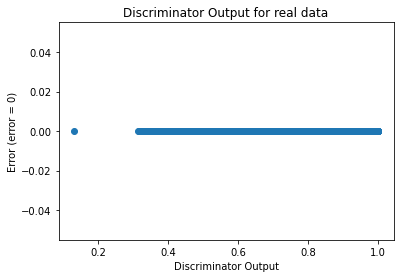

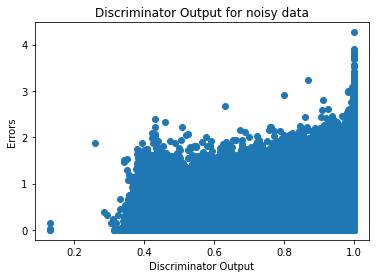

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
